In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
walmart_df = pd.read_csv("walmart.csv")
print(walmart_df.shape)
print(walmart_df.iloc[0])

(550068, 10)
User_ID                         1000001
Product_ID                    P00069042
Gender                                F
Age                                0-17
Occupation                           10
City_Category                         A
Stay_In_Current_City_Years            2
Marital_Status                        0
Product_Category                      3
Purchase                           8370
Name: 0, dtype: object


In [3]:
international_df = pd.read_csv("Dataset1/International sale Report.csv")
print(international_df.shape)
print(international_df.iloc[0])

(37432, 10)
index                         0
DATE                   06-05-21
Months                   Jun-21
CUSTOMER     REVATHY LOGANATHAN
Style                   MEN5004
SKU                MEN5004-KR-L
Size                          L
PCS                        1.00
RATE                     616.56
GROSS AMT                617.00
Name: 0, dtype: object


In [4]:
national_df = pd.read_csv("Dataset1/Sale Report.csv")
print(national_df.shape)
print(national_df.iloc[0])

(9271, 7)
index                     0
SKU Code        AN201-RED-L
Design No.            AN201
Stock                   5.0
Category      AN : LEGGINGS
Size                      L
Color                   Red
Name: 0, dtype: object


In [5]:
prices_21_df = pd.read_csv("Dataset1/P L March 2021.csv")
print(prices_21_df.shape)
print(prices_21_df.iloc[0])

(1330, 18)
index                        0
Sku               Os206_3141_S
Style Id            Os206_3141
Catalog                Moments
Category                 Kurta
Weight                     0.3
TP 1                       538
TP 2                    435.78
MRP Old                   2178
Final MRP Old             2295
Ajio MRP                  2295
Amazon MRP                2295
Amazon FBA MRP            2295
Flipkart MRP              2295
Limeroad MRP              2295
Myntra MRP                2295
Paytm MRP                 2295
Snapdeal MRP              2295
Name: 0, dtype: object


In [6]:
prices_22_df = pd.read_csv("Dataset1/May-2022.csv")
print(prices_22_df.shape)
print(prices_22_df.iloc[0])

(1330, 17)
index                        0
Sku               Os206_3141_S
Style Id            Os206_3141
Catalog                Moments
Category                 Kurta
Weight                     0.3
TP                         538
MRP Old                   2178
Final MRP Old             2295
Ajio MRP                  2295
Amazon MRP                2295
Amazon FBA MRP            2295
Flipkart MRP              2295
Limeroad MRP              2295
Myntra MRP                2295
Paytm MRP                 2295
Snapdeal MRP              2295
Name: 0, dtype: object


In [7]:
amazon_df = pd.read_csv("Dataset1/Amazon sale Report.csv")
print(amazon_df.shape)
print(amazon_df.iloc[0])

# Preprocessing Amazon Data
amazon_df = amazon_df[amazon_df['Qty'] > 0]
amazon_df = amazon_df[amazon_df['Status'] != 'Cancelled']
amazon_df = amazon_df.drop(['promotion-ids', 'Unnamed: 22'], axis=1)
print(amazon_df.shape)
print(amazon_df['Status'].unique())

print(amazon_df.columns)


/var/folders/0h/y7x46tzs4n7_bwqfd9b2c0q00000gn/T/ipykernel_39700/4240943460.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_df = pd.read_csv("Dataset1/Amazon sale Report.csv")


(128975, 24)
index                                   0
Order ID              405-8078784-5731545
Date                             04-30-22
Status                          Cancelled
Fulfilment                       Merchant
Sales Channel                   Amazon.in
ship-service-level               Standard
Style                              SET389
SKU                        SET389-KR-NP-S
Category                              Set
Size                                    S
ASIN                           B09KXVBD7Z
Courier Status                        NaN
Qty                                     0
currency                              INR
Amount                             647.62
ship-city                          MUMBAI
ship-state                    MAHARASHTRA
ship-postal-code                 400081.0
ship-country                           IN
promotion-ids                         NaN
B2B                                 False
fulfilled-by                    Easy Ship
Unnamed: 22          

In [8]:

# year_data = [x[-2:] for x in amazon_df['Date']]
# # print(list(set(year_data)))

# month_data = [x[:2] for x in amazon_df['Date']]
# # print(list(set(month_data)))

# # Change date to just be the month for easier grouping
# amazon_df['Date'] = amazon_df['Date'].apply(lambda x: x[:2])

# cols = amazon_df.columns.drop(['Qty', 'Amount'])
# column_extraction = amazon_df[cols]

# # Aggregate all columns expect quantity by the most common value
# agg_dict = {'Qty': 'sum', 'Amount': 'sum'}
# for col in column_extraction:
#     agg_dict[col] = lambda x: pd.Series.mode(x, dropna=False)[0]
# product_grouping = amazon_df.groupby(["SKU", "Date"]).agg(agg_dict)
# product_grouping.sort_values(by="Amount", ascending=False, inplace=True)


In [9]:
# print(product_grouping.iloc[:10, :2])

In [10]:
def classification_accuracy(true_labels, predicted_labels):
    num_right = 0
    for i in range(len(predicted_labels)):
        if true_labels[i] == predicted_labels[i]:
            num_right += 1
    return num_right / len(predicted_labels)

In [11]:
from sklearn.model_selection import train_test_split
def generate_train_test(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [12]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import LabelEncoder


In [13]:
# Label Encoding to turn categorical data to numerical data
encoders = []
def encode_cats(df, categorical_cols):
       for col in categorical_cols:
              encoder = LabelEncoder()
              encoded_categories = encoder.fit_transform(df[col])
              df[col] = encoded_categories
              encoders.append(encoder)

In [14]:
# categorical_cols = ['Status', 'Fulfilment', 'Sales Channel ',
#        'ship-service-level', 'Category', 'Size', 'ASIN',
#        'Courier Status', 'ship-city',
#        'ship-state', 'ship-postal-code',
#        'fulfilled-by', 'B2B']
categorical_cols = ['Sales Channel ','Category', 'Size']

encode_cats(amazon_df, categorical_cols)

# Drop columns without predictive power
drop_cols = ['Fulfilment', 'SKU', 'Style', 'Order ID', 'currency', 'ship-postal-code', 'Courier Status']


# features = ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'ship-city',
#             'ship-state', 'fulfilled-by']
# features = ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Category', 'Size', 'Courier Status', 'fulfilled-by']
features = ['Sales Channel ', 'Category', 'Size']



X = amazon_df[features]
y = amazon_df['Qty']
X_train, X_test, y_train, y_test = generate_train_test(X, y)
print(X_train.iloc[0])
print(y_train.iloc[0])

Sales Channel     0
Category          5
Size              7
Name: 84353, dtype: int64
1


In [15]:
from sklearn.decomposition import PCA
def pca_decomp(X_train, X_test, n_components=3):
    pca = PCA(n_components)
    pca_cols = ['PC' + str(i+1) for i in range(n_components)]
    train_principal_components = pca.fit_transform(X_train)
    train_pca = pd.DataFrame(data=train_principal_components, columns=pca_cols)

    print(train_pca.shape)
    print(X_train.shape)

    loadings = pca.components_
    # print(loadings.shape)

    # Higher absolute loading values indicate a large contribution to the principal component
    loadings_df = pd.DataFrame(loadings.T, columns=pca_cols, index=X_train.columns)
    print(loadings_df)


    # Transform test data to the principal component space
    test_principal_components = pca.transform(X_test)
    test_pca = pd.DataFrame(data=test_principal_components, columns=pca_cols)
    return train_pca, test_pca
train_pca, test_pca = pca_decomp(X_train, X_test, 3)


(88429, 3)
(88429, 3)
                     PC1       PC2       PC3
Sales Channel   0.000007  0.000108  1.000000
Category        0.012865 -0.999917  0.000108
Size           -0.999917 -0.012865  0.000008


In [16]:
# Convert dataframe to tensor
def df_to_tensor(df, dtype):
    array = df.to_numpy()
    return torch.tensor(array, dtype=dtype)


In [17]:
# Use PCA columns as features to reduce dimensionality
# X_train = train_pca
# X_test = test_pca

X_train_tensor = df_to_tensor(X_train, torch.long)
y_train_tensor = df_to_tensor(y_train, torch.float32)
X_test_tensor = df_to_tensor(X_test, torch.long)
y_test_tensor = df_to_tensor(y_test, torch.float32)
print(X_train.shape)

(88429, 3)


In [26]:
# Train the model
def train_model(model, dataloader, optimizer, criterion, num_epochs=10):
    model.train()
    mean_losses = []
    for epoch in range(num_epochs):
        losses = []
        for X, y in dataloader:
            optimizer.zero_grad()
            outputs = model(X)
            loss = criterion(outputs.squeeze(), y)
            loss.backward()
            optimizer.step()
            losses.append(loss.item())
        mean_loss = np.mean(losses)
        print(f'Epoch {epoch+1}/{num_epochs}, Mean Loss: {mean_loss}')
        mean_losses.append(mean_loss)
    return mean_losses

# Predict on dataset X based on the trained model
def predict_values(X, y, model, criterion, type='Test'):
    model.eval()
    with torch.no_grad():
        predictions = model(X)
        print(type + "ing loss: ", criterion(predictions.squeeze(), y))

In [29]:
# Create DataLoader
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Instantiate device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move data onto device
X_train_tensor.to(device)
X_test_tensor.to(device)
y_train_tensor.to(device)
y_test_tensor.to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)

# Simple Test Model
class SimpleNNWithEmbeddings(nn.Module):
    def __init__(self, embeddings_1, embeddings_2, embeddings_3, embedding_dim, hidden_dim):
        super(SimpleNNWithEmbeddings, self).__init__()
        self.embedding1 = nn.Embedding(embeddings_1, embedding_dim)
        self.embedding2 = nn.Embedding(embeddings_2, embedding_dim)
        self.embedding3 = nn.Embedding(embeddings_3, embedding_dim)
        self.fc1 = nn.Linear(embedding_dim * 3, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
    
    def forward(self, X):
        X1 = self.embedding1(X[:, 0])
        X2 = self.embedding2(X[:, 1])
        # print(X[0, :])
        X3 = self.embedding3(X[:, 2])
        X = torch.cat((X1, X2, X3), dim=1)
        X = torch.relu(self.fc1(X))
        X = torch.sigmoid(self.fc2(X))
        return X

# Instantiate the model
embeddings_1 = len(encoders[0].classes_)
embeddings_2 = len(encoders[1].classes_)
embeddings_3 = len(encoders[2].classes_)

embedding_dim = 8
hidden_dim = 16
model = SimpleNNWithEmbeddings(embeddings_1, embeddings_2, embeddings_3, embedding_dim, hidden_dim)
model.to(device)

# Define loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train and predict on the dataset
mean_losses = train_model(model, train_dataloader, optimizer, criterion, 10)
print(mean_losses)
predict_values(X_train, y_train, criterion, 'Train')
predict_values(X_test, y_test, model, criterion, 'Test')

Using device: cpu


KeyboardInterrupt: 

In [ ]:
# Simple LSTM model for time series predictions
class SimpleLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=1):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = SimpleLSTM(input_dim=10, hidden_dim=50, output_dim=1)

In [ ]:

cols = amazon_df.columns.drop(['Qty', 'Amount'])
column_extraction = amazon_df[cols]

# Aggregate all columns expect quantity by the most common value
agg_dict = {'Qty': 'sum', 'Amount': 'sum'}
for col in column_extraction:
    agg_dict[col] = lambda x: pd.Series.mode(x, dropna=False)[0]
product_grouping = amazon_df.groupby("SKU").agg(agg_dict)
product_grouping.sort_values(by="Amount", ascending=False, inplace=True)

# Drop columns not useful for this analysis
product_grouping.drop(['index', 'Fulfilment', 'Sales Channel ', 'SKU', 'Style', 'Order ID', 'currency', 'ship-postal-code',  
                       'ship-country', 'Courier Status', 'fulfilled-by'], axis=1, inplace=True)


/var/folders/0h/y7x46tzs4n7_bwqfd9b2c0q00000gn/T/ipykernel_3119/300830076.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  agg_dict[col] = lambda x: pd.Series.mode(x, dropna=False)[0]
/var/folders/0h/y7x46tzs4n7_bwqfd9b2c0q00000gn/T/ipykernel_3119/300830076.py:7: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  agg_dict[col] = lambda x: pd.Series.mode(x, dropna=False)[0]


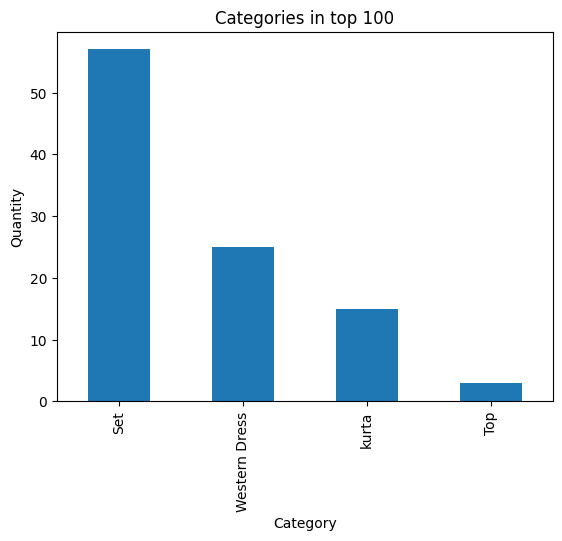

In [ ]:
top_100 = product_grouping[:100]
cat_counts = top_100['Category'].value_counts().plot(kind='bar', ylabel='Quantity', title='Categories in top 100')

# print(cat_counts)
# plt.bar(cat_counts)
# plt.xlabel('Category')
# plt.ylabel('Quantity')
# plt.show()

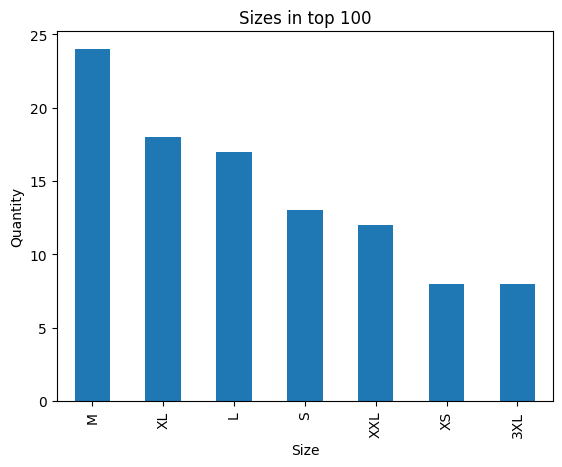

In [ ]:
size_counts = top_100['Size'].value_counts().plot(kind='bar', ylabel='Quantity', title='Sizes in top 100')